In [ ]:
! git clone https://github.com/i1idan/Fake_profile_detection-ensemble-autoencoder.git

In [ ]:
%cd Fake_profile_detection-ensemble-autoencoder

# **Install Requiremnets**

In [ ]:
! pip install gender_guesser
! pip install dropconnect-tensorflow

# **Explore Dataset**

In [40]:
import pandas as pd

df_users = pd.read_csv('data/users.csv')
df_fusers = pd.read_csv('data/fusers.csv')




In [41]:
df_users.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,1.481000e+03,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,397.0,4.0,719.0,1423.0,486.0,1063.000000,0.0,0.0
mean,4.000432e+08,3140.782579,690.922350,403.128292,439.611749,5.360567,1.0,1.0,1.0,1.0,1.0,1535.841957,NaN,NaN
std,2.961304e+08,6391.957957,11058.508986,610.572368,1970.556008,32.183232,0.0,0.0,0.0,0.0,0.0,7805.690161,NaN,NaN
min,3.610511e+06,3.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,1.572905e+08,315.000000,45.000000,115.000000,4.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
50%,3.822478e+08,992.000000,102.000000,226.000000,29.000000,1.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
75%,5.229255e+08,3029.000000,259.000000,437.000000,176.000000,2.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
max,1.219743e+09,79876.000000,408372.000000,12773.000000,44349.000000,744.000000,1.0,1.0,1.0,1.0,1.0,36000.000000,NaN,NaN


In [42]:
df_fusers.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,1.337000e+03,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,0.0,1331.0,4.0,2.0,1337.0,3.0,6.000000,0.0,0.0
mean,6.897381e+08,45.442034,16.842184,386.761406,7.383695,0.002992,NaN,1.0,1.0,1.0,1.0,1.0,-8700.000000,NaN,NaN
std,2.135086e+08,97.765536,8.011299,210.139672,89.155940,0.054636,NaN,0.0,0.0,0.0,0.0,0.0,31247.847926,NaN,NaN
min,3.738459e+07,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,6.163001e+08,26.000000,13.000000,278.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-36000.000000,NaN,NaN
50%,6.170879e+08,36.000000,18.000000,344.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-8100.000000,NaN,NaN
75%,6.192317e+08,53.000000,22.000000,538.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,19800.000000,NaN,NaN
max,1.391998e+09,1576.000000,73.000000,1998.000000,1402.000000,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,19800.000000,NaN,NaN


In [43]:
frames = [df_users, df_fusers]
X = pd.concat(frames)
X.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13


# **EDA  Genuine Users Vs Fake Users**

***statuses_count***

In [44]:
import seaborn as sns
from matplotlib import pyplot as plt


sns.set(rc={'figure.figsize':(15,8)})

***The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. ***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'statuses_count Genuine Users')

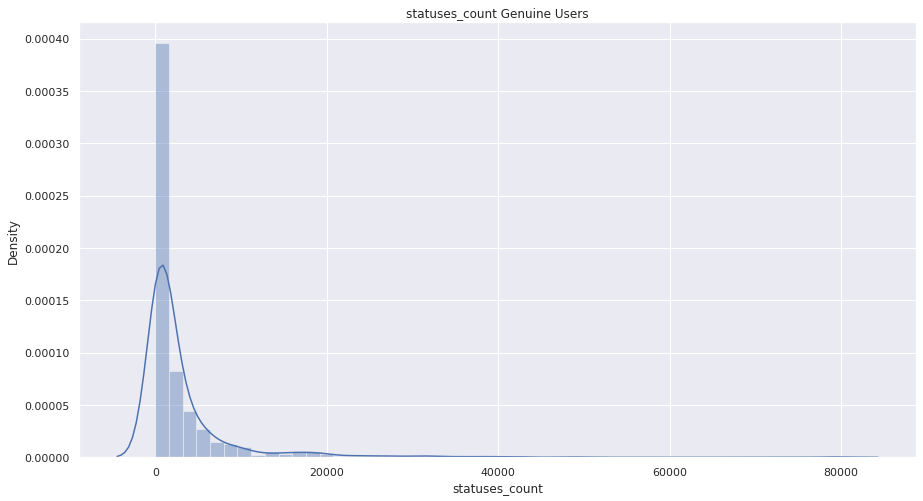

In [49]:
sns.distplot(df_users["statuses_count"] )
plt.title('statuses_count Genuine Users')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'statuses_count Fake Users')

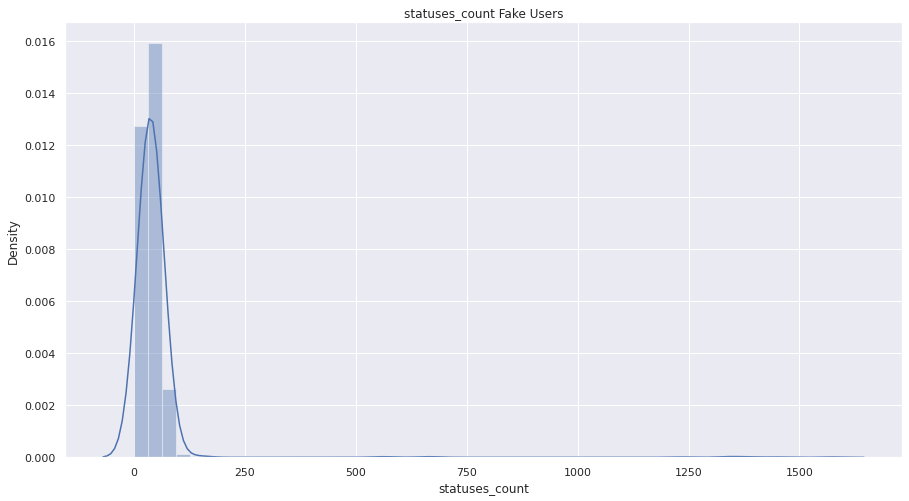

In [50]:
sns.distplot(df_fusers["statuses_count"])
plt.title('statuses_count Fake Users')

*followers_count*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'statuses_count Genuine Users')

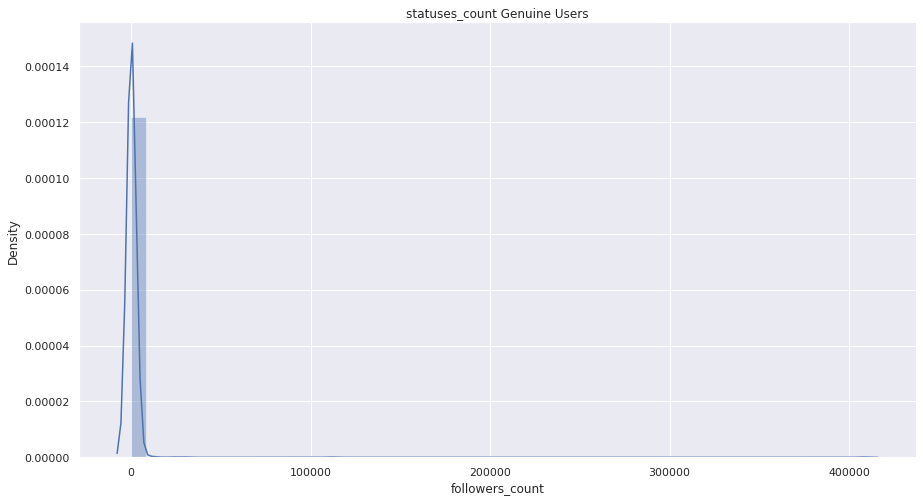

In [51]:
sns.distplot(df_users["followers_count"])
plt.title('statuses_count Genuine Users')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'statuses_count Fake Users')

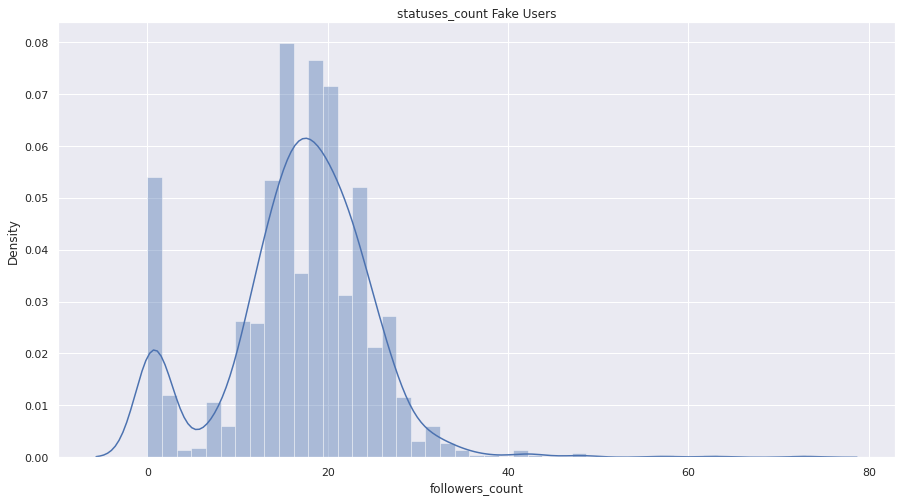

In [52]:
sns.distplot(df_fusers["followers_count"])
plt.title('statuses_count Fake Users')

*friends_count*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'friends_count Genuine Users')

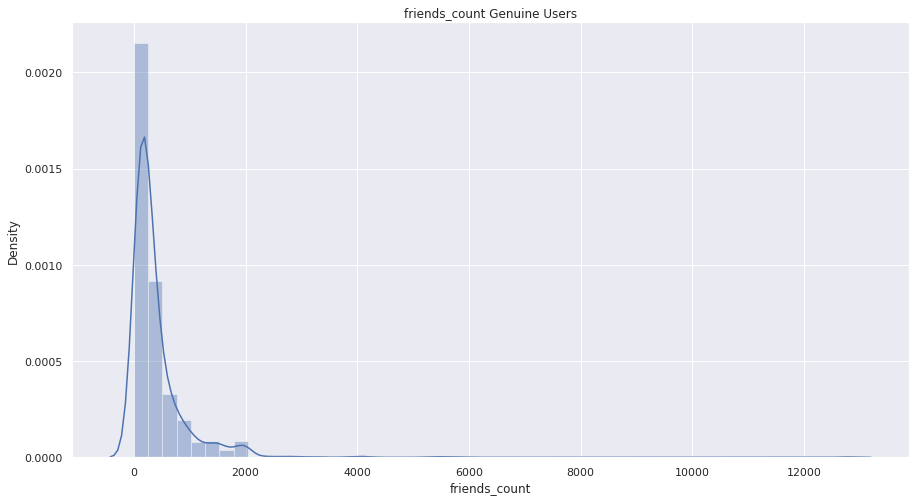

In [53]:
sns.distplot(df_users["friends_count"])
plt.title('friends_count Genuine Users')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'friends_count Fake Users')

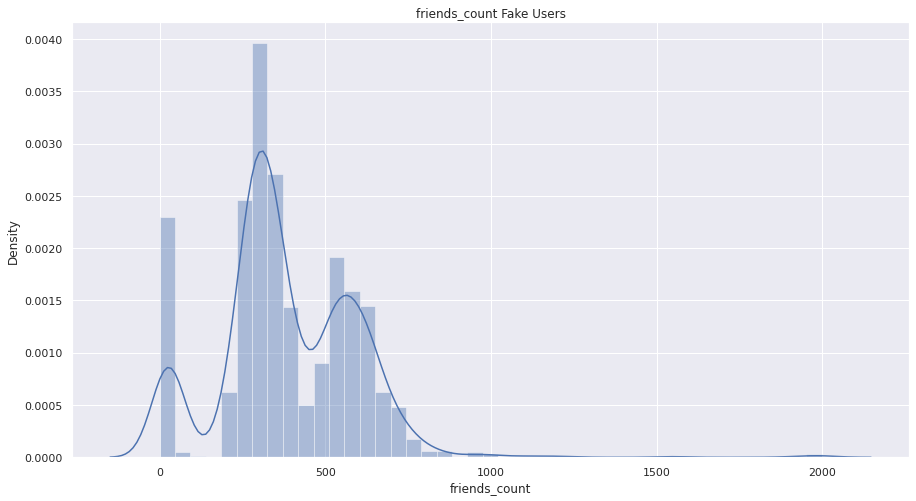

In [54]:
sns.distplot(df_fusers["friends_count"])
plt.title('friends_count Fake Users')

*favourites_count*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'favourites_count Genuine Users')

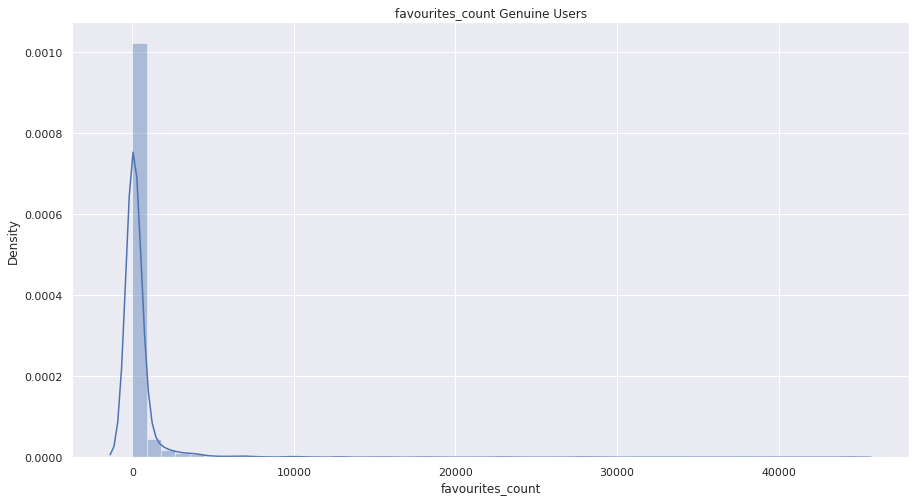

In [55]:
sns.distplot(df_users["favourites_count"])
plt.title('favourites_count Genuine Users')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'favourites_count Fake Users')

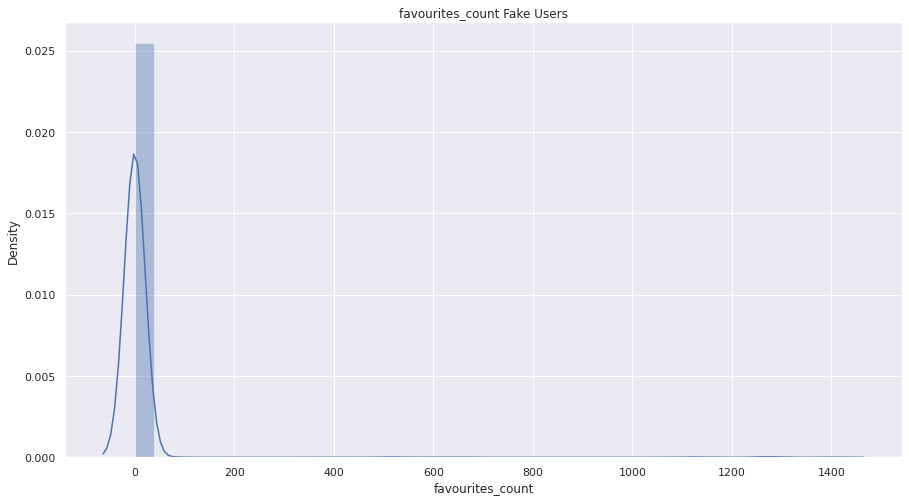

In [56]:
sns.distplot(df_fusers["favourites_count"])
plt.title('favourites_count Fake Users')

*listed_count*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'listed_count Genuine Users')

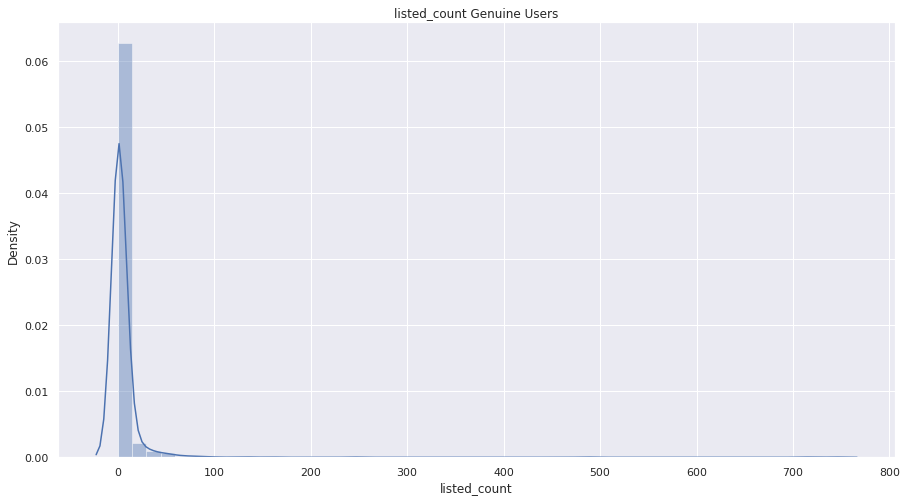

In [57]:
sns.distplot(df_users["listed_count"])
plt.title('listed_count Genuine Users')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'listed_count Fake Users')

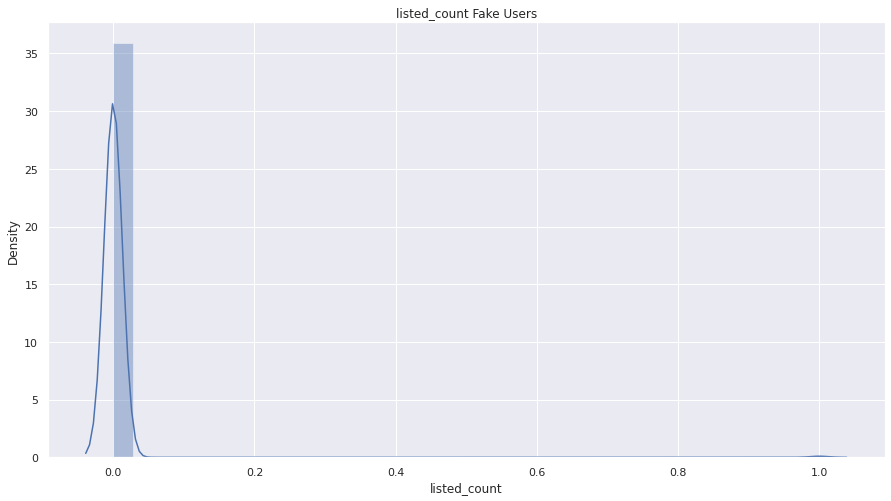

In [58]:
sns.distplot(df_fusers["listed_count"])
plt.title('listed_count Fake Users')

# **add extra features (gender)**

In [59]:
import gender_guesser.detector as gender
d = gender.Detector()
print(d.get_gender(u"Bob"))


male


In [60]:
name_list = [ st.split(' ')[0] for st in X['name'].values ]

In [61]:
gender = [d.get_gender(name) for name in name_list ]

In [62]:
X['gender'] = gender
X.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,gender
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13,male
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13,female
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13,unknown
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13,unknown
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13,male


**The result will be one of unknown (name not found), andy (androgynous), male, female, mostly_male, or mostly_female. The difference between andy and unknown is that the former is found to have the same probability to be male than to be female, while the later means that the name wasn’t found in the database.**

In [63]:
X['gender'].unique()

array(['male', 'female', 'unknown', 'andy', 'mostly_female',
       'mostly_male'], dtype=object)

Text(0.5, 1.0, 'Gender of All Users')

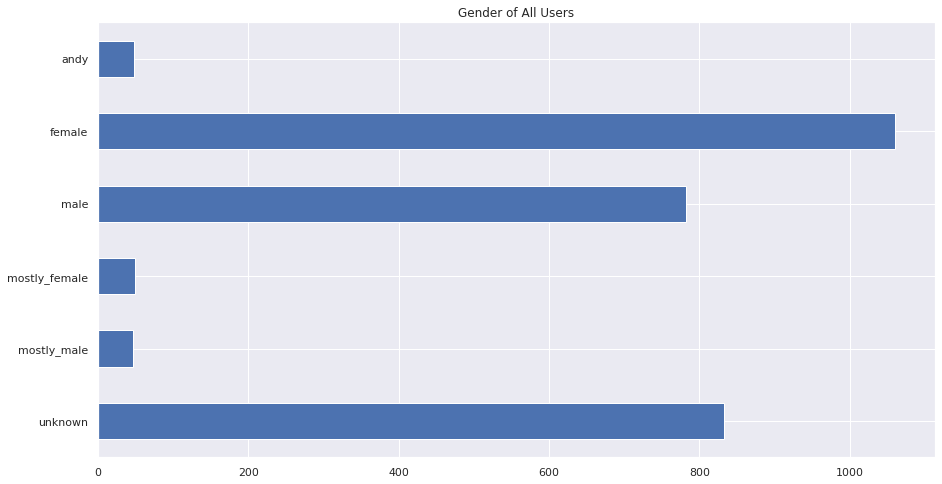

In [64]:
X.gender.value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Gender of All Users')

Text(0.5, 1.0, 'Gender of All Users')

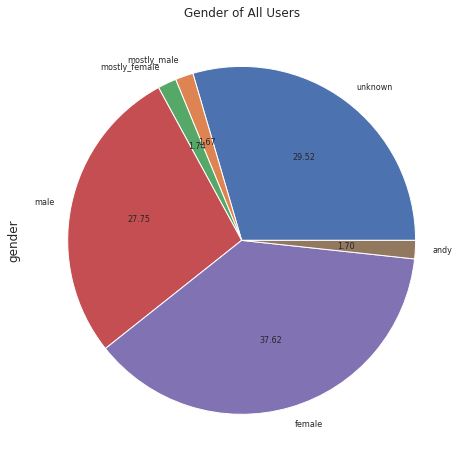

In [65]:
X.gender.value_counts().sort_index(ascending=False).plot(kind='pie', autopct='%.2f', fontsize=8)
plt.title('Gender of All Users')

Text(0.5, 1.0, 'Gender of Geniune Users')

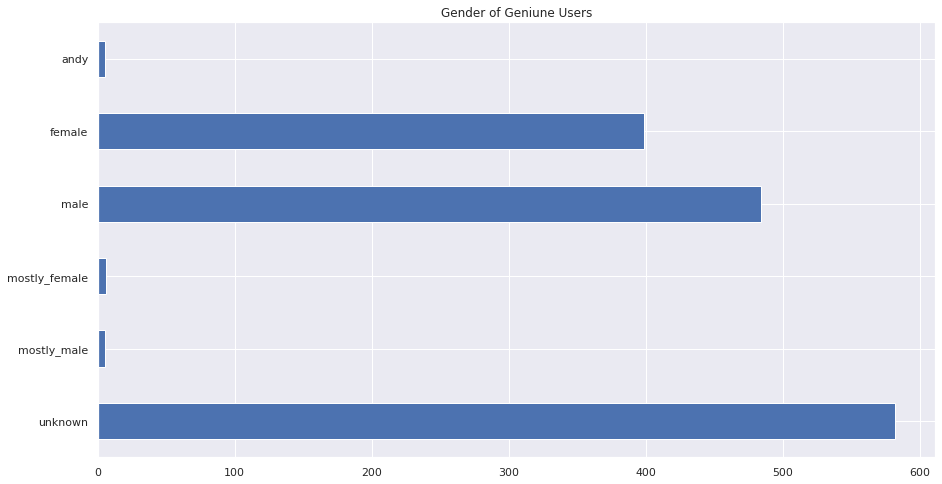

In [66]:
X.iloc[0:1481].gender.value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Gender of Geniune Users')

Text(0.5, 1.0, 'Gender of Geniune Users')

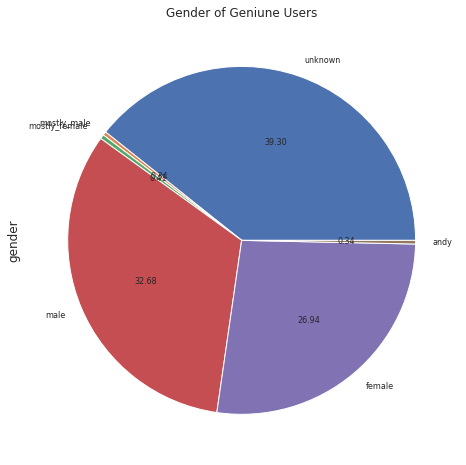

In [67]:
X.iloc[0:1481].gender.value_counts().sort_index(ascending=False).plot(kind='pie', autopct='%.2f', fontsize=8)
plt.title('Gender of Geniune Users')

Text(0.5, 1.0, 'Gender of Fake Users')

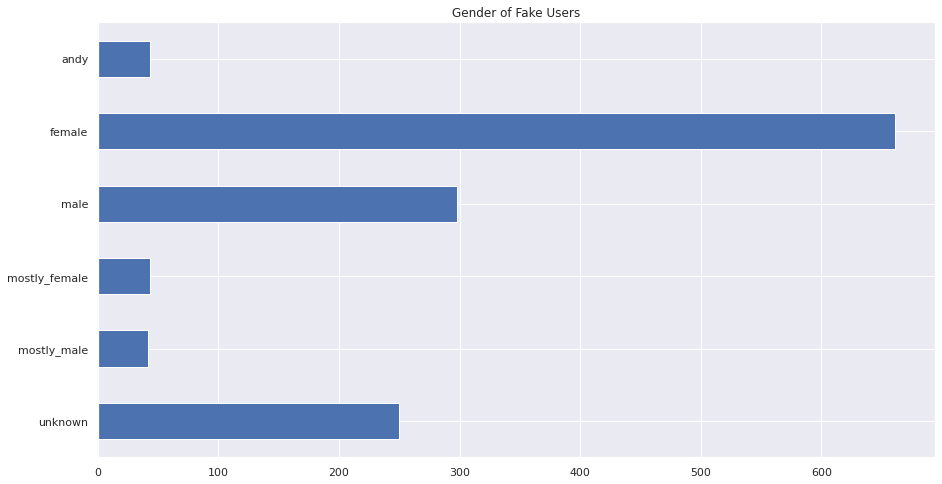

In [68]:
X.iloc[1481:].gender.value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Gender of Fake Users')

Text(0.5, 1.0, 'Gender of Fake Users')

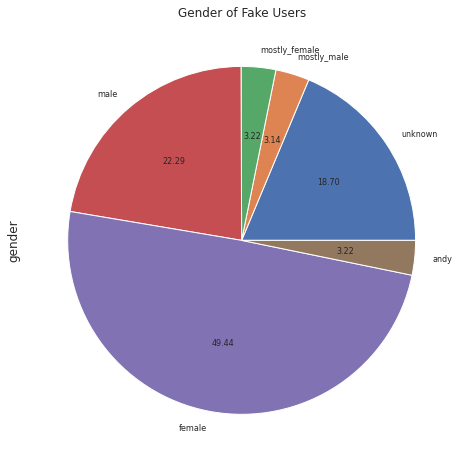

In [69]:
X.iloc[1481:].gender.value_counts().sort_index(ascending=False).plot(kind='pie', autopct='%.2f', fontsize=8)
plt.title('Gender of Fake Users')

# **Preparing the Dataset for Training**

In [72]:
feature_columns_to_use = ['statuses_count','followers_count','friends_count','favourites_count','listed_count', 'gender']
X=X.loc[:,feature_columns_to_use]
X.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,gender
0,20370,5470,2385,145,52,male
1,3131,506,381,9,40,female
2,4024,264,87,323,16,unknown
3,40586,640,622,1118,32,unknown
4,2016,62,64,13,0,male


In [73]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X['gender'])
X['gender'] = le.transform(X['gender'])
X.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,gender
0,20370,5470,2385,145,52,2
1,3131,506,381,9,40,1
2,4024,264,87,323,16,5
3,40586,640,622,1118,32,5
4,2016,62,64,13,0,2


In [74]:
from sklearn import preprocessing

#normalize
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5
0,0.255020,0.013395,0.186722,0.003270,0.069892,0.4
1,0.039198,0.001239,0.029829,0.000203,0.053763,0.2
2,0.050378,0.000646,0.006811,0.007283,0.021505,1.0
3,0.508113,0.001567,0.048696,0.025209,0.043011,1.0
4,0.025239,0.000152,0.005011,0.000293,0.000000,0.4
...,...,...,...,...,...,...
2813,0.000013,0.000000,0.001331,0.000000,0.000000,0.2
2814,0.000000,0.000002,0.001331,0.000000,0.000000,0.4
2815,0.000025,0.000000,0.001174,0.000000,0.000000,0.2
2816,0.000025,0.000000,0.001253,0.000000,0.000000,0.2


In [75]:
Y=len(df_users)*[0] + len(df_fusers)*[1]

In [76]:
import numpy as np

X = np.array(x_scaled)
Y = np.array(Y)

print(X.shape, Y.shape)

(2818, 6) (2818,)


In [77]:
X = X.reshape(X.shape[0], X.shape[1], 1)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 6, 32)             256       
                                                                 
 activation (Activation)     (None, 6, 32)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 1, 32)            128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1, 32)             0   

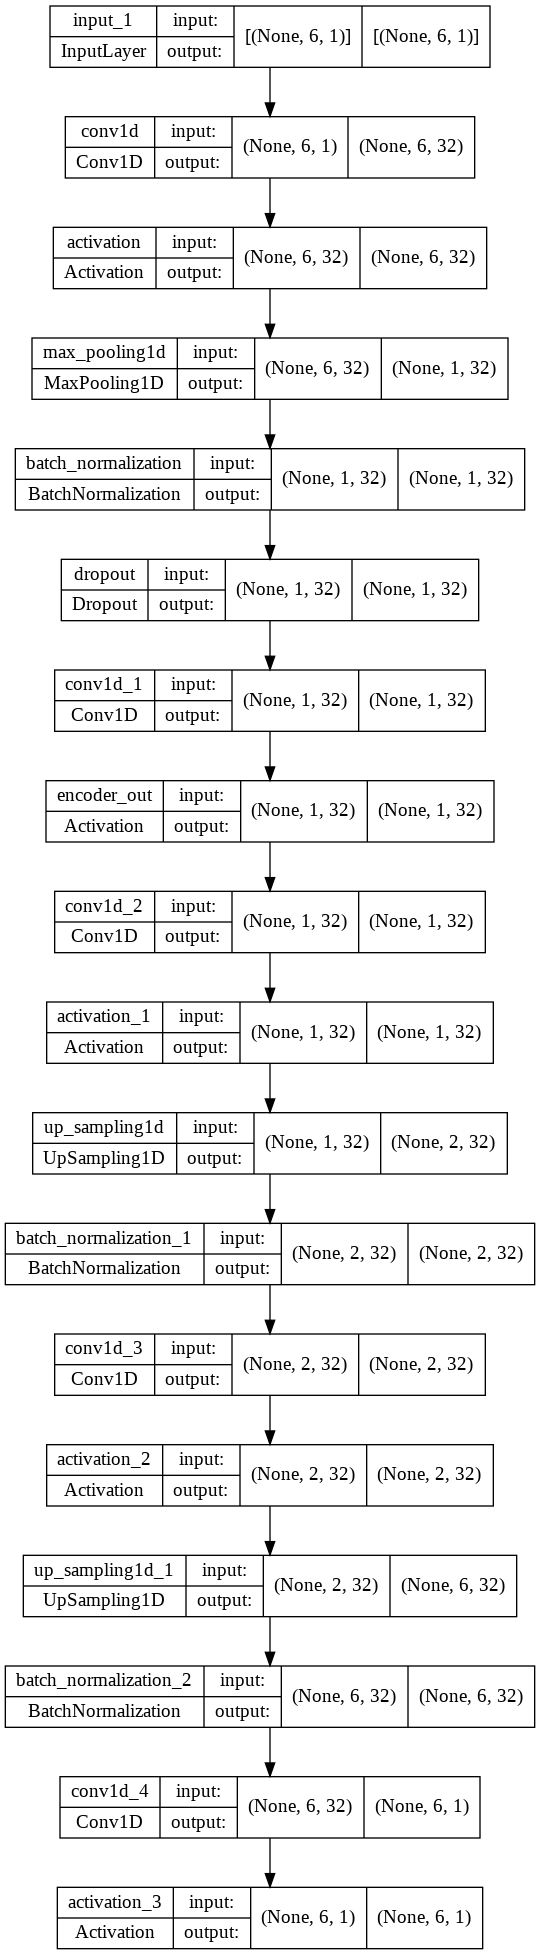

In [78]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Reshape, Conv1D, Dropout
from tensorflow.keras.layers import AveragePooling1D, UpSampling1D, Activation
from tensorflow.keras.layers import ZeroPadding1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

inputs = Input(shape=(6, 1))
# ENCODER
# part 1
x = Conv1D(32, 7, padding='same', strides=1)(inputs)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=4)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)
x = Dropout(0.5)(x)
x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu', name='encoder_out')(x)

# DECODER
# part 2
x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = UpSampling1D(2)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)

x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = UpSampling1D(3)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)

x = Conv1D(1, 7, padding='same', strides=1)(x)
x = Activation('tanh')(x)

model= Model(inputs, x)

print(model.summary())
plot_model(model, show_shapes=True)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2254, 6, 1)
(564, 6, 1)


In [ ]:
# adadelta for autoencoder

model.compile(loss='mse',
              optimizer='adadelta')
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=200, batch_size=16)

Epoch 1/200
141/141 [==============================] - 5s 16ms/step - loss: 0.8643 - val_loss: 0.6551
Epoch 2/200
141/141 [==============================] - 1s 8ms/step - loss: 0.8399 - val_loss: 0.8818
Epoch 3/200
141/141 [==============================] - 1s 5ms/step - loss: 0.8327 - val_loss: 0.9990
Epoch 4/200
141/141 [==============================] - 1s 5ms/step - loss: 0.8270 - val_loss: 1.0243
Epoch 5/200
141/141 [==============================] - 1s 5ms/step - loss: 0.8140 - val_loss: 0.9835
Epoch 6/200
141/141 [==============================] - 1s 5ms/step - loss: 0.8130 - val_loss: 0.9435
Epoch 7/200
141/141 [==============================] - 1s 6ms/step - loss: 0.7987 - val_loss: 0.9270
Epoch 8/200
141/141 [==============================] - 1s 4ms/step - loss: 0.7917 - val_loss: 0.9073
Epoch 9/200
141/141 [==============================] - 1s 4ms/step - loss: 0.7779 - val_loss: 0.8852
Epoch 10/200
141/141 [==============================] - 1s 4ms/step - loss: 0.7629 - val_l

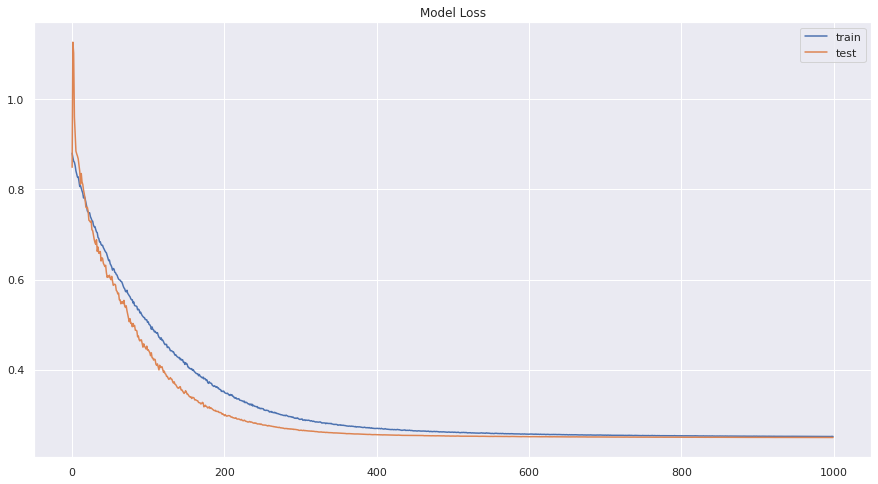

In [ ]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Model Loss")
plt.show()

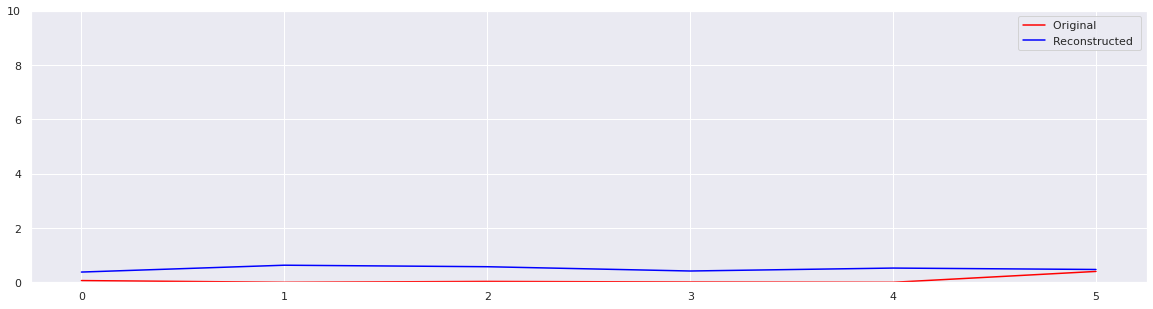

In [ ]:
# plot created model output 
import numpy as np

preds = model.predict(X_test)
plt.figure(figsize=(20, 5))
plt.plot(X_test[10], color='red', label = 'Original ')
# plt.figure(figsize=(20, 5))
plt.plot(preds[10], color='blue', label = 'Reconstructed ')
plt.ylim(0, 10)
plt.legend() 


In [80]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Input, ReLU, BatchNormalization, Flatten, MaxPool2D
from dropconnect_tensorflow import DropConnectDense
# classification model creation
# encoder only model.

clf_in = model.input
clf_out = [layer.output for layer in model.layers if layer.name == 'encoder_out'][0]
clf_x = Flatten()(clf_out)
clf_x = DropConnectDense(units=1, prob=0.5, activation="relu", use_bias=True)(clf_x)
clf_x = Dense(1, activation='sigmoid')(clf_x)
clf = tf.keras.models.Model(inputs=clf_in,
                            outputs=clf_x)
print(clf.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 6, 32)             256       
                                                                 
 activation (Activation)     (None, 6, 32)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 1, 32)            128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1, 32)             0   

In [ ]:
# sgd for classification
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
clf.compile(loss='binary_crossentropy',
            optimizer=opt, metrics=['accuracy'])
history = clf.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                  epochs=200, batch_size=4)

Epoch 1/200
564/564 [==============================] - 3s 3ms/step - loss: 0.6879 - accuracy: 0.5426 - val_loss: 0.6596 - val_accuracy: 0.5461
Epoch 2/200
564/564 [==============================] - 2s 3ms/step - loss: 0.6606 - accuracy: 0.5581 - val_loss: 0.6299 - val_accuracy: 0.6879
Epoch 3/200
564/564 [==============================] - 2s 3ms/step - loss: 0.6411 - accuracy: 0.6340 - val_loss: 0.6096 - val_accuracy: 0.6809
Epoch 4/200
564/564 [==============================] - 2s 4ms/step - loss: 0.6203 - accuracy: 0.6646 - val_loss: 0.5878 - val_accuracy: 0.6897
Epoch 5/200
564/564 [==============================] - 4s 6ms/step - loss: 0.6054 - accuracy: 0.6508 - val_loss: 0.5783 - val_accuracy: 0.7766
Epoch 6/200
564/564 [==============================] - 2s 4ms/step - loss: 0.5919 - accuracy: 0.6668 - val_loss: 0.5685 - val_accuracy: 0.7411
Epoch 7/200
564/564 [==============================] - 2s 4ms/step - loss: 0.5809 - accuracy: 0.6832 - val_loss: 0.5564 - val_accuracy: 0.7429

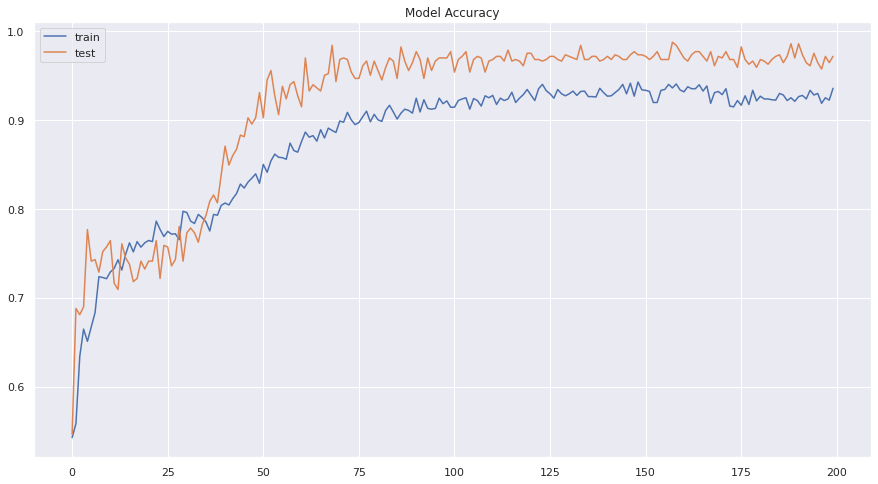

In [88]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.legend()
plt.show()

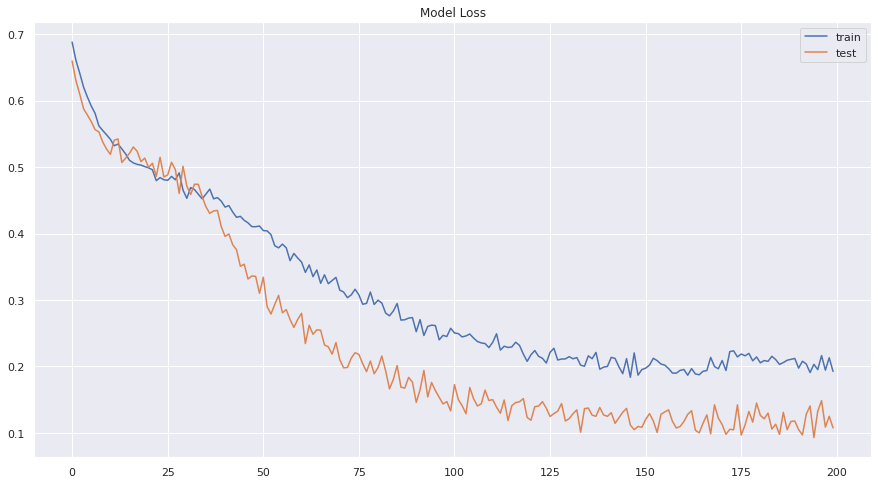

In [90]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import classification_report 


preds = np.around(clf.predict(X_test))
rep = classification_report(Y_test, preds)
print(rep)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       308
           1       0.95      0.99      0.97       256

    accuracy                           0.97       564
   macro avg       0.97      0.97      0.97       564
weighted avg       0.97      0.97      0.97       564



Accuracy is: 97.16312056737588
[[294  14]
 [  2 254]]


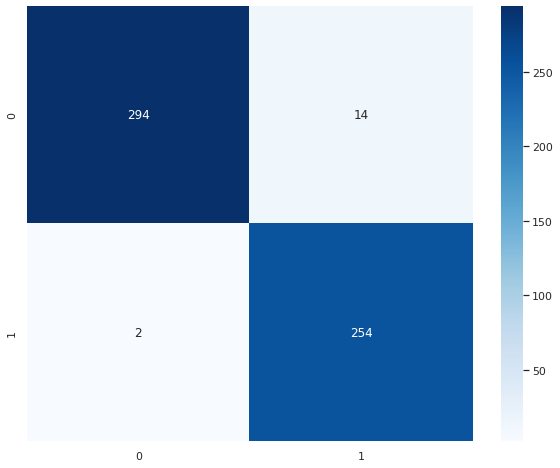

In [92]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

acc = accuracy_score(Y_test, preds)
print('Accuracy is:' , acc * 100)

conftest =  confusion_matrix(Y_test, preds)
print(conftest)

plt.figure(figsize = (10,8))
sns.heatmap(conftest, cmap = 'Blues' ,annot=True, fmt='d')


# **Ensemble Autoencoder**

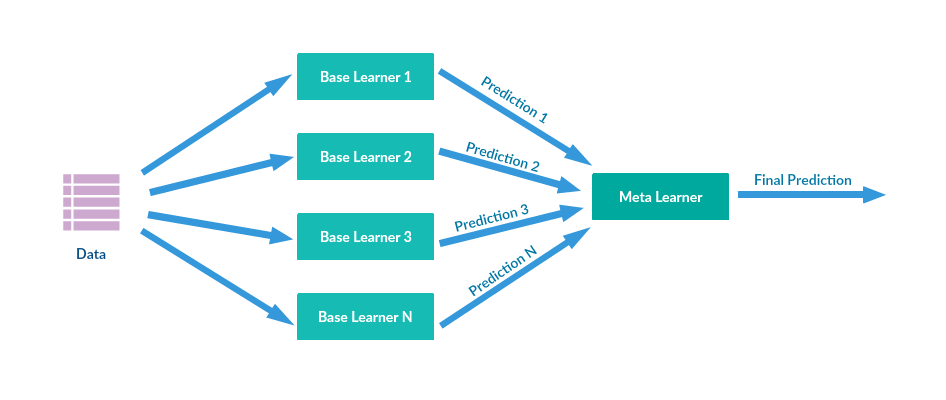

In [93]:
def fit_model(trainX, trainy):
      inputs = Input(shape=(6, 1))
      # ENCODER
      # part 1
      x = Conv1D(32, 7, padding='same', strides=1)(inputs)
      x = Activation('relu')(x)
      x = MaxPooling1D(pool_size=4)(x)
      x = BatchNormalization(axis=-1, momentum=0.99)(x)
      x = Dropout(0.5)(x)
      x = Conv1D(32, 7, padding='same', strides=1)(x)
      x = Activation('relu', name='encoder_out')(x)

      # DECODER
      # part 2
      x = Conv1D(32, 7, padding='same', strides=1)(x)
      x = Activation('relu')(x)
      x = UpSampling1D(2)(x)
      x = BatchNormalization(axis=-1, momentum=0.99)(x)

      x = Conv1D(32, 7, padding='same', strides=1)(x)
      x = Activation('relu')(x)
      x = UpSampling1D(3)(x)
      x = BatchNormalization(axis=-1, momentum=0.99)(x)

      x = Conv1D(1, 7, padding='same', strides=1)(x)
      x = Activation('tanh')(x)

      model= Model(inputs, x)

      clf_in = model.input
      clf_out = [layer.output for layer in model.layers if layer.name == 'encoder_out'][0]
      clf_x = Flatten()(clf_out)
      clf_x = DropConnectDense(units=1, prob=0.5, activation="relu", use_bias=True)(clf_x)
      clf_x = Dense(1, activation='sigmoid')(clf_x)
      clf = tf.keras.models.Model(inputs=clf_in,
                                  outputs=clf_x)
      opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
      clf.compile(loss='binary_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
      clf.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                        epochs=200, batch_size=4)
      return clf

In [94]:

# fit and save models
n_members = 3
for i in range(n_members):
	# fit model
	model = fit_model(X_train, Y_train)
	# save model
	filename = 'models/model_' + str(i + 1) + '.h5'
	model.save(filename)
	print('>Saved %s' % filename)

/content/drive/MyDrive
Epoch 1/200
564/564 [==============================] - 3s 3ms/step - loss: 0.6890 - accuracy: 0.5861 - val_loss: 0.6872 - val_accuracy: 0.5567
Epoch 2/200
564/564 [==============================] - 2s 3ms/step - loss: 0.6847 - accuracy: 0.6149 - val_loss: 0.6787 - val_accuracy: 0.5762
Epoch 3/200
564/564 [==============================] - 2s 3ms/step - loss: 0.6805 - accuracy: 0.6122 - val_loss: 0.6731 - val_accuracy: 0.5887
Epoch 4/200
564/564 [==============================] - 2s 3ms/step - loss: 0.6772 - accuracy: 0.6233 - val_loss: 0.6681 - val_accuracy: 0.6082
Epoch 5/200
564/564 [==============================] - 2s 3ms/step - loss: 0.6717 - accuracy: 0.6384 - val_loss: 0.6610 - val_accuracy: 0.6135
Epoch 6/200
564/564 [==============================] - 2s 4ms/step - loss: 0.6656 - accuracy: 0.6535 - val_loss: 0.6551 - val_accuracy: 0.6277
Epoch 7/200
564/564 [==============================] - 2s 3ms/step - loss: 0.6638 - accuracy: 0.6548 - val_loss: 0.6495

In [95]:
# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'models/model_' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename,  custom_objects={"DropConnectDense":DropConnectDense})
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [96]:
from keras.models import load_model
# load all models
n_members = 3
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded /content/drive/MyDrive/models/model_1.h5
>loaded /content/drive/MyDrive/models/model_2.h5
>loaded /content/drive/MyDrive/models/model_3.h5
Loaded 3 models


In [97]:

# evaluate standalone models on test dataset
for model in members:
	_, acc = model.evaluate(X_test, Y_test, verbose=0)
	print('Model Accuracy: %.3f' % acc)

Model Accuracy: 0.982
Model Accuracy: 0.970
Model Accuracy: 0.970


# **Separate Stacking Model**

In [36]:
from numpy import dstack
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.models import load_model
from numpy import dstack

# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX


def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression()
	model.fit(stackedX, inputy)
	return model

# fit stacked model using the ensemble
model = fit_stacked_model(members, X_test, Y_test)  


def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat


yhat = stacked_prediction(members, model, X_test)
acc = accuracy_score(Y_test, yhat)
print('Stacked Test Accuracy: %.3f' % acc)




Stacked Test Accuracy: 0.979


In [37]:
from sklearn.metrics import classification_report 


preds = np.around(yhat)
rep = classification_report(Y_test, preds)
print(rep)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       308
           1       0.96      0.99      0.98       256

    accuracy                           0.98       564
   macro avg       0.98      0.98      0.98       564
weighted avg       0.98      0.98      0.98       564



Accuracy is: 97.87234042553192
[[298  10]
 [  2 254]]


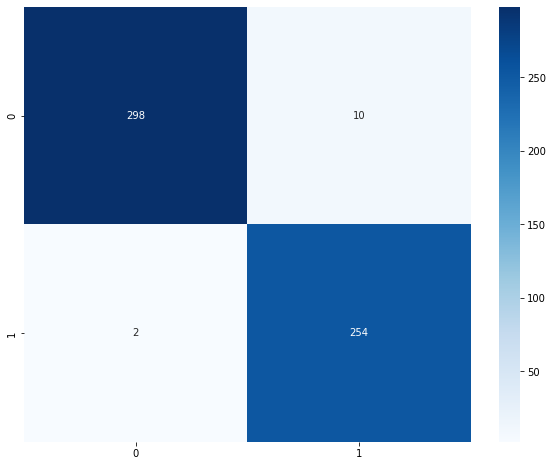

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


acc = accuracy_score(Y_test,  np.round(yhat))
print('Accuracy is:' , acc * 100)

conftest =  confusion_matrix(Y_test,  np.round(yhat))
print(conftest)

plt.figure(figsize = (10,8))
sns.heatmap(conftest, cmap = 'Blues' ,annot=True, fmt='d')


# **Integrated Stacking Model**

In [82]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.layers import concatenate
from numpy import argmax
from dropconnect_tensorflow import DropConnectDense, DropConnectConv2D

# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'models/model_' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename, custom_objects={"DropConnectDense":DropConnectDense})
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models
 
# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(1, activation='sigmoid')(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	# inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)
 
# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=0)
 

# load all models
n_members = 3
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
# define ensemble model
stacked_model = define_stacked_model(members)
# fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test, Y_test)
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
acc = accuracy_score(Y_test, np.round(yhat))
print('Stacked Test Accuracy: %.3f' % acc)

>loaded /content/drive/MyDrive/models/model_1.h5
>loaded /content/drive/MyDrive/models/model_2.h5
>loaded /content/drive/MyDrive/models/model_3.h5
Loaded 3 models
Stacked Test Accuracy: 0.972


(-0.5, 1967.5, 1511.5, -0.5)

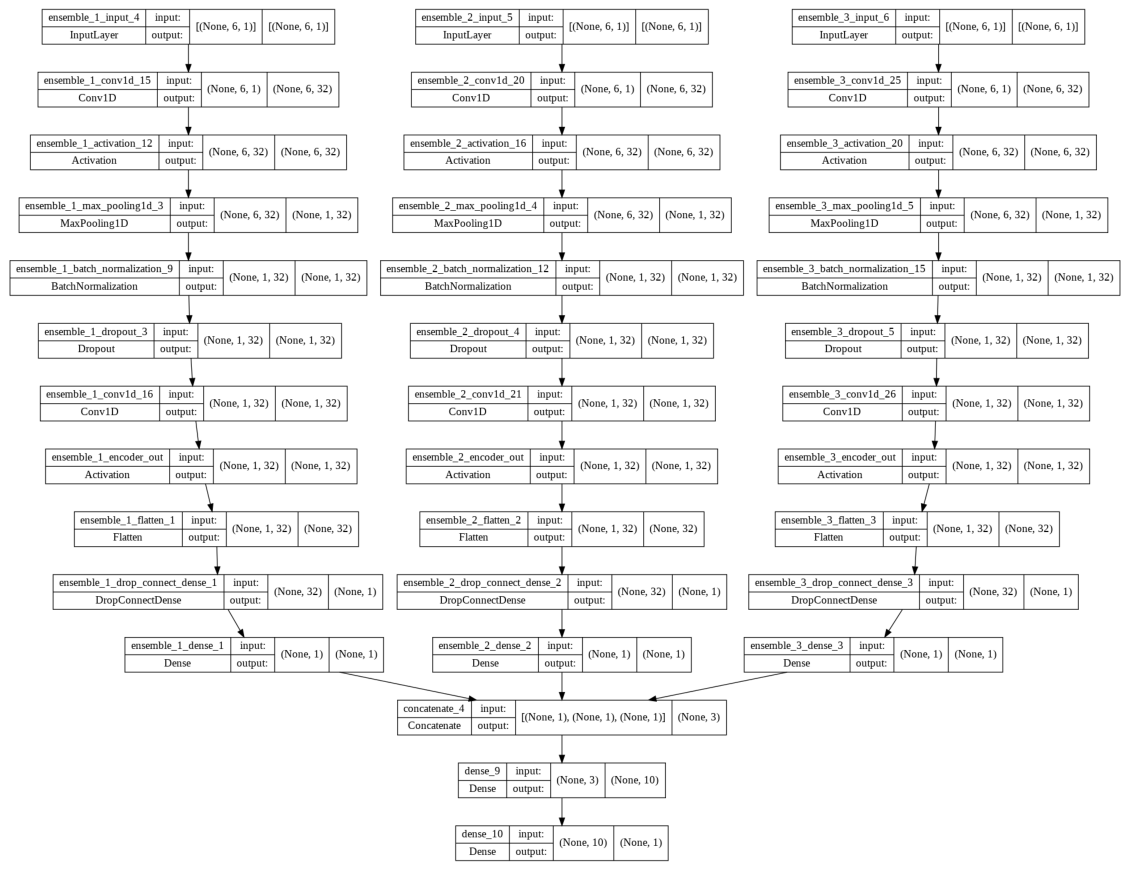

In [88]:
import matplotlib.image as mpimg

im = mpimg.imread('model_graph.png')
plt.figure(figsize = (20, 20))
plt.imshow(im)
plt.axis('off')

In [35]:
from sklearn.metrics import classification_report 


preds = np.around(yhat)
rep = classification_report(Y_test, preds)
print(rep)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       308
           1       0.95      0.99      0.97       256

    accuracy                           0.97       564
   macro avg       0.97      0.97      0.97       564
weighted avg       0.97      0.97      0.97       564



Accuracy is: 97.16312056737588
[[294  14]
 [  2 254]]


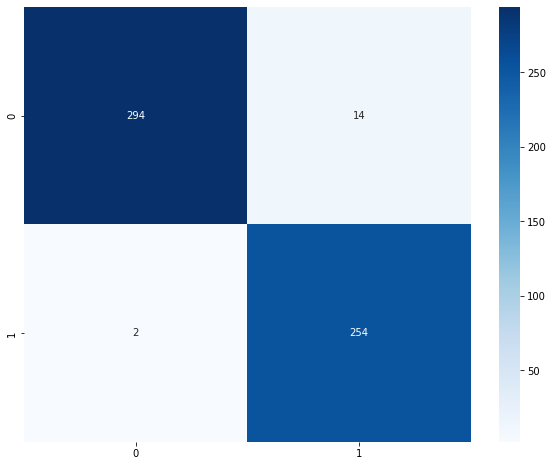

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


acc = accuracy_score(Y_test,  np.round(yhat))
print('Accuracy is:' , acc * 100)

conftest =  confusion_matrix(Y_test,  np.round(yhat))
print(conftest)

plt.figure(figsize = (10,8))
sns.heatmap(conftest, cmap = 'Blues' ,annot=True, fmt='d')
